# Task06分享 - 场景案例显神通

学习内容：https://github.com/datawhalechina/fantastic-matplotlib

本节将通过可视化方法探索data文件夹中的数据集。

+ Drugs数据集
+ diamonds数据集
+ pokemon数据集

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Drugs数据集

In [2]:
data = pd.read_csv('data/Drugs.csv')
len(data)

24062

In [3]:
data.head()

YYYY State           COUNTY  SubstanceName  DrugReports
0  2010    VA         ACCOMACK   Propoxyphene            1
1  2010    OH            ADAMS       Morphine            9
2  2010    PA            ADAMS      Methadone            2
3  2010    VA  ALEXANDRIA CITY         Heroin            5
4  2010    PA        ALLEGHENY  Hydromorphone            5

### 查看YYYY的范围

In [4]:
data['YYYY'].min(), data['YYYY'].max()

(2010, 2017)

### 打印其他字段信息

In [5]:
for c in ['State', 'COUNTY', 'SubstanceName', 'DrugReports']:
    print(c, end=' ')
    ci = data[c].drop_duplicates()

    print(f'(len={len(ci)})')

    for i in ci[:50]:
        print(i, end=', ')
    print('\n')

State (len=5)
VA, OH, PA, KY, WV, 

COUNTY (len=358)
ACCOMACK, ADAMS, ALEXANDRIA CITY, ALLEGHENY, ALLEN, AMELIA, ARLINGTON, ARMSTRONG, ASHLAND, ASHTABULA, ATHENS, AUGLAIZE, BARBOUR, BARREN, BATH, BEDFORD, BELL, BERKELEY, BERKS, BLAND, BOONE, BRACKEN, BRAXTON, BREATHITT, BRECKINRIDGE, BROWN, BUCKINGHAM, BUCKS, BULLITT, BUTLER, CABELL, CALHOUN, CAMBRIA, CAMERON, CARBON, CAROLINE, CARROLL, CARTER, CASEY, CHARLOTTESVILLE CITY, CHESAPEAKE CITY, CHESTER, CHESTERFIELD, CHRISTIAN, CLARION, CLEARFIELD, CLERMONT, CLINTON, COLONIAL HEIGHTS CITY, COLUMBIA, 

SubstanceName (len=69)
Propoxyphene, Morphine, Methadone, Heroin, Hydromorphone, Oxycodone, Oxymorphone, Dextropropoxyphene, Buprenorphine, Hydrocodone, Meperidine, Fentanyl, Dihydromorphone, Methorphan, Codeine, Tramadol, Pethidine, Dihydrocodeine, Opiates, Opium, Pentazocine, Alphaprodine, Acetylcodeine, Thebaine, Butorphanol, Nalbuphine, ANPP, Desmethylprodine , Remifentanil, Mitragynine, Acetyldihydrocodeine, Hydrocodeinone, MT-45, Levorph

In [6]:
data['DrugReports'].min(), data['DrugReports'].max()

(1, 5075)

### YYYY和State的分布

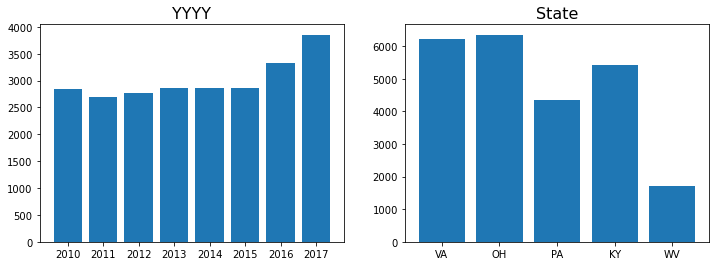

In [7]:
from collections import Counter

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.reshape(-1)

for i, c in enumerate(['YYYY', 'State']):
    dic = dict(Counter(data[c]))
    axes[i].set_title(c, size=16)
    axes[i].bar(dic.keys(), dic.values())

### SubstanceName和DrugReports的分布

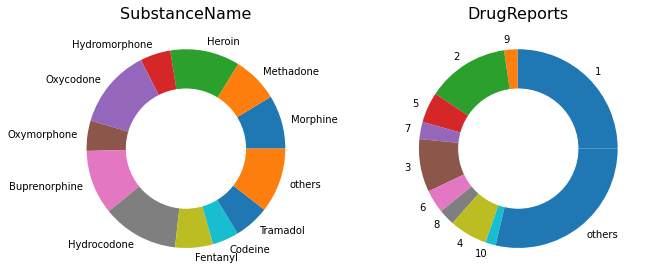

In [8]:
def draw_pie(ax, col, limit=400):
    dic = dict(Counter(data[col]))

    others = 0
    dic_2 = {}
    for k,v in dic.items():
        if v < limit:
            others += v
        else:
            dic_2[k] = v

    dic_2['others'] = others

    circle = plt.Circle( (0,0), 0.6, color='white')

    _ = ax.pie(dic_2.values(), labels=dic_2.keys())

    ax.set_title(col, size=16)
    ax.add_artist(circle)

columns = ['SubstanceName', 'DrugReports']
fig, axes = plt.subplots(1, len(columns), figsize=(10, 4))

for t in zip(axes.reshape(-1), columns):
    draw_pie(*t)

fig.tight_layout()

### COUNTY的分布

In [9]:
Counter(data['COUNTY']).most_common(10)

[('FRANKLIN', 357),
 ('MONTGOMERY', 330),
 ('WARREN', 302),
 ('FAYETTE', 282),
 ('JEFFERSON', 262),
 ('WASHINGTON', 249),
 ('MERCER', 242),
 ('WAYNE', 211),
 ('DELAWARE', 209),
 ('BUTLER', 200)]

### State分布随YYYY的变化趋势

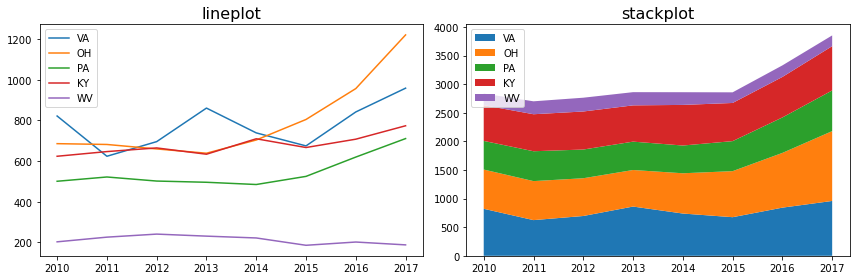

In [10]:
df = pd.DataFrame(index=range(2010, 2018), columns=['VA', 'OH', 'PA', 'KY', 'WV'])

for y in range(2010, 2018):
    dic = dict(Counter(data[data.YYYY==y]['State']))
    for k,v in dic.items():
        df.loc[y][k] = v

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('lineplot', size=16)
for c in df.columns:
    axes[0].plot(df.index, df[c], label=c)
axes[0].legend(loc='upper left')

axes[1].set_title('stackplot', size=16)
axes[1].stackplot(df.index, [list(df[c]) for c in df.columns], labels=df.columns)
axes[1].legend(loc='upper left')

fig.tight_layout()

## diamonds数据集

In [11]:
data = pd.read_csv('data/diamonds.csv')

len(data)

53940

In [12]:
data.head()

carat      cut clarity  price
0   0.23    Ideal     SI2    326
1   0.21  Premium     SI1    326
2   0.23     Good     VS1    327
3   0.29  Premium     VS2    334
4   0.31     Good     SI2    335

In [13]:
for c in ['cut', 'clarity']:
    print(data[c].drop_duplicates())

0        Ideal
1      Premium
2         Good
5    Very Good
8         Fair
Name: cut, dtype: object
0       SI2
1       SI1
2       VS1
3       VS2
5      VVS2
6      VVS1
15       I1
229      IF
Name: clarity, dtype: object


### price和各特征的关系

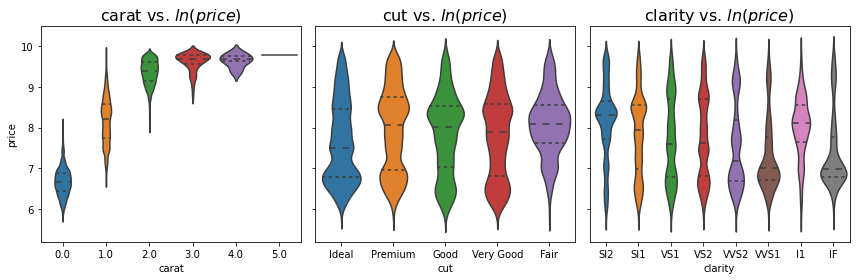

In [14]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, c in enumerate(['carat', 'cut', 'clarity']):
    x = data[c]
    if isinstance(x[0], float):
        x = np.round(x)
    sns.violinplot(ax=axes[i], x=x, y=np.log(data['price']), inner='quartile')
    if i > 0:
        axes[i].set_ylabel('')
    axes[i].set_title(c + ' vs. $ln(price)$', size=16)

fig.tight_layout()

### 各特征的数量分布

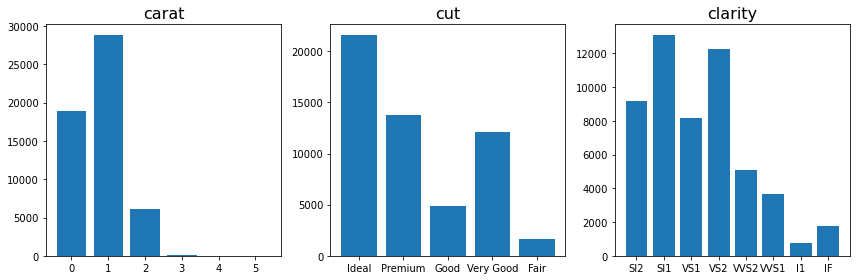

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, c in enumerate(['carat', 'cut', 'clarity']):
    x = data[c]
    if isinstance(x[0], float):
        x = np.round(x)
    dic = dict(Counter(x))
    axes[i].bar(dic.keys(), dic.values())
    axes[i].set_title(c, size=16)

fig.tight_layout()

### 构建一个决策树来判断哪个特征对价格影响最大

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['cut', 'clarity']
for c in categorical_cols:
    data[c] = LabelEncoder().fit_transform(data[c])

x_train = data[['carat'] + categorical_cols]
y_train = data['price']

In [17]:
data.head()

carat  cut  clarity  price
0   0.23    2        3    326
1   0.21    3        2    326
2   0.23    1        4    327
3   0.29    3        5    334
4   0.31    1        3    335

In [18]:
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train)

0.9538947475687758

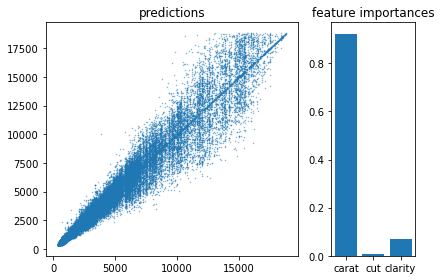

In [19]:
y_pred = model.predict(x_train)

fig = plt.figure(figsize=(6, 4))
grid_spec = fig.add_gridspec(1, 2, width_ratios=[3, 1])
axes = [fig.add_subplot(grid_spec[i]) for i in [0, 1]]

axes[0].scatter(y_pred, y_train, s=0.2, alpha=0.6)
axes[0].set_title('predictions')

axes[1].bar(['carat'] + categorical_cols, model.feature_importances_)
axes[1].set_title('feature importances')

fig.tight_layout()

可以看到价格越高，预测越不准确。carat数对价格的影响最大。

## pokemon数据集

In [20]:
data = pd.read_csv('data/pokemon.csv')

len(data)

800

In [21]:
data.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [22]:
data = data.drop(columns=['#', 'Total'])
data.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

### 查看属性的相关性

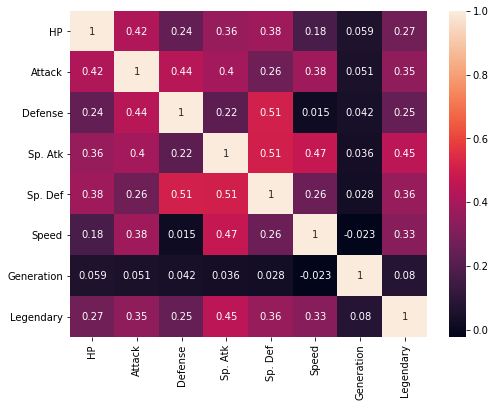

In [23]:
ax = plt.gca()
sns.heatmap(data.corr(), ax=ax, annot=True)
ax.figure.set_figwidth(8)
ax.figure.set_figheight(6)

### 查看generation对应属性分布

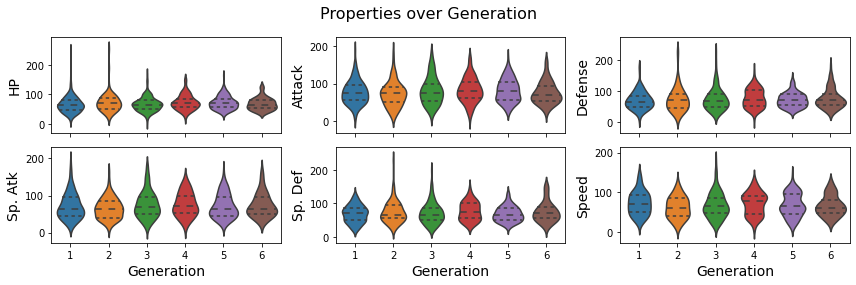

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharex=True)
axes = axes.reshape(-1)

for i, c in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
    sns.violinplot(ax=axes[i], x=data['Generation'], y=data[c], inner='quartile')
    if i < 3:
        axes[i].set_xlabel('')
    else:
        axes[i].set_xlabel('Generation', size=14)
    axes[i].set_ylabel(c, size=14)

fig.suptitle('Properties over Generation', size=16)
fig.tight_layout()

### 查看各个属性的异常值分布

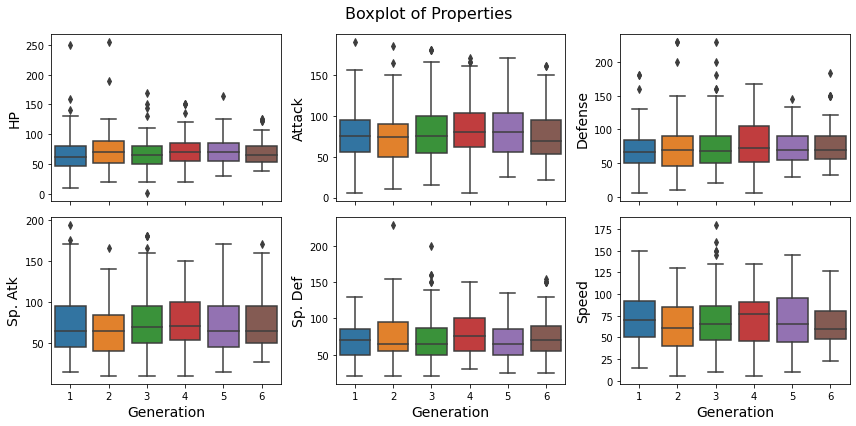

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True)
axes = axes.reshape(-1)

for i, c in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
    sns.boxplot(ax=axes[i], x=data['Generation'], y=data[c])
    if i < 3:
        axes[i].set_xlabel('')
    else:
        axes[i].set_xlabel('Generation', size=14)
    axes[i].set_ylabel(c, size=14)

fig.suptitle('Boxplot of Properties', size=16)
fig.tight_layout()

### 属性值分布的直方图

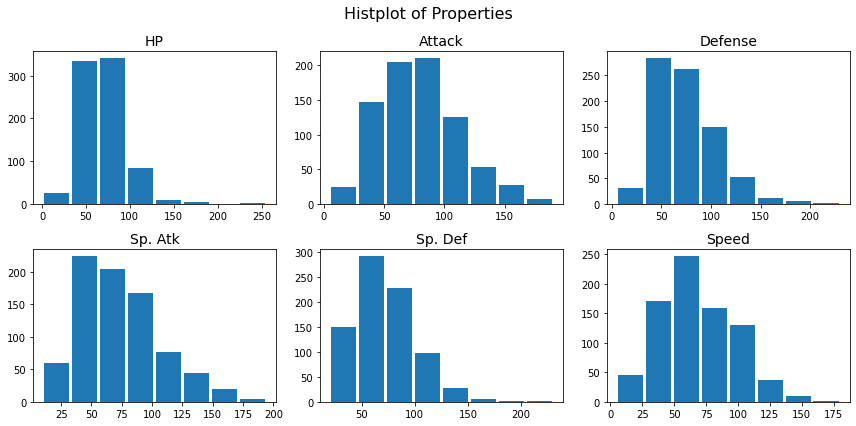

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.reshape(-1)

for i, c in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
    axes[i].hist(data[c], bins=8, rwidth=0.9)
    axes[i].set_xlabel('')
    axes[i].set_title(c, size=14)

fig.suptitle('Histplot of Properties', size=16)
fig.tight_layout()

## 完